In [1]:
import cv2 as cv
import sys

In [2]:
img=cv.imread('soccer.jpg')

**RGB 컬러 영상을 채널별로 구분해 디스플레이하기**

In [ ]:
if img is None:
    sys.exit('nope.')
#이미 창 이름 표시
cv.imshow('original_RGB',img)
cv.imshow('Upper left half', img[0:img.shape[0]//2, 0:img.shape[1]//2, :])
#cv.imshow('Center half', img[img.shape[0]//4 : 2*img.shape[0]//4,
#                             img.shape[1]//4 : 3*img.shape[1]//4,:])

#cv.imshow('R channel', img[:,:,2])
cv.imshow('G channel', img[:,:,1])
#cv.imshow('B channel', img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()




**실제 영상에서 힘스토그램 구하기**

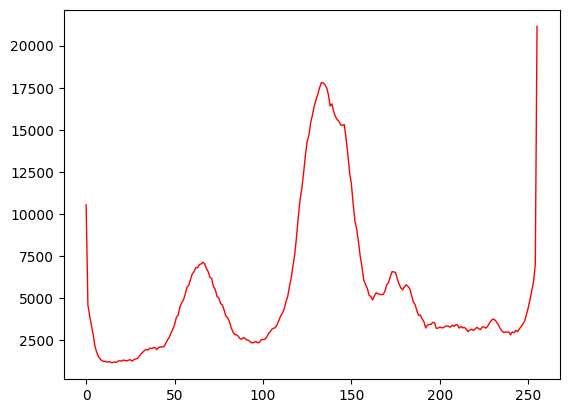

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('soccer.jpg')
h=cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1)

**오츄 알고리즘으로 이진화하기**

In [14]:
import cv2 as cv
import sys

img=cv.imread('soccer.jpg')

t,bin_img=cv.threshold(img[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print('otsu=',t)

cv.imshow('R channel',img[:,:,1])
cv.imshow('R channel binarization',bin_img)

cv.waitKey()
cv.destroyAllWindows()

otsu= 117.0


**모폴로지 연산 적용**

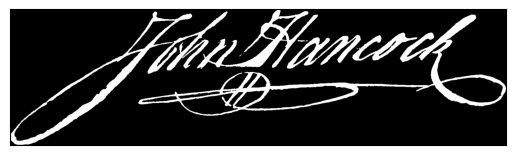

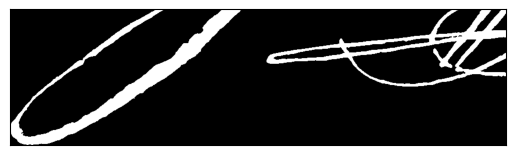

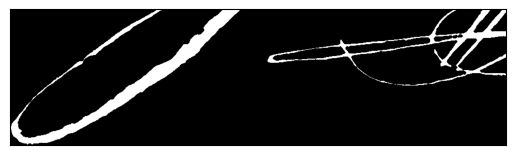

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('JohnHancocksSignature.png',cv.IMREAD_UNCHANGED)

t,bin_img=cv.threshold(img[:,:,3],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

b=bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

se=np.uint8([[0,0,1,0,0],
             [0,1,1,1,0],
             [1,1,1,1,1],
             [0,1,1,1,0],
             [0,0,1,0,0]])

#팽창
# b_dilation=cv.dilate(b,se,iterations=1)
# plt.imshow(b_dilation,cmap='gray'),plt.xticks([]),plt.yticks([])
# plt.show()

#침식
b_erosion=cv.erode(b,se,iterations=1)
plt.imshow(b_erosion,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

#닫힘
# b_closing=cv.erode(b,se,iterations=1)
# plt.imshow(b_closing,cmap='gray'),plt.xticks([]),plt.yticks([])
# plt.show()

**감마 보정 실험하기**

In [20]:
import cv2 as cv
import numpy as np

img=cv.imread('soccer.jpg')
img=cv.resize(img,dsize=(0,0),fx=0.25,fy=0.25)

def gamma(f,gamma=1.0):
    f1=f/255.0
    return np.uint8(255*(f1**gamma))

gc=np.hstack((gamma(img,0.5),gamma(img,0.75),gamma(img,1.0),gamma(img,2.0),gamma(img,3.0)))
cv.imshow('gamma',gc)

cv.waitKey()
cv.destroyAllWindows()

**히스토그램 평활화하기**

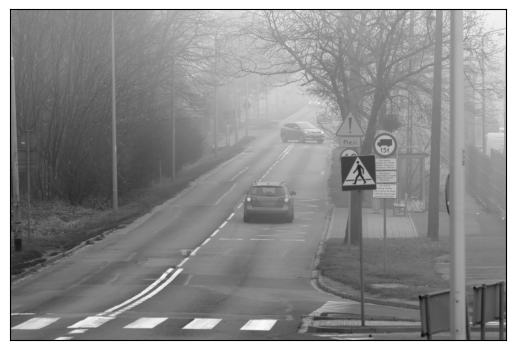

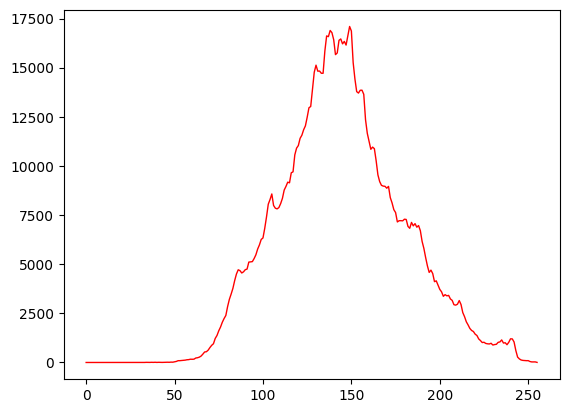

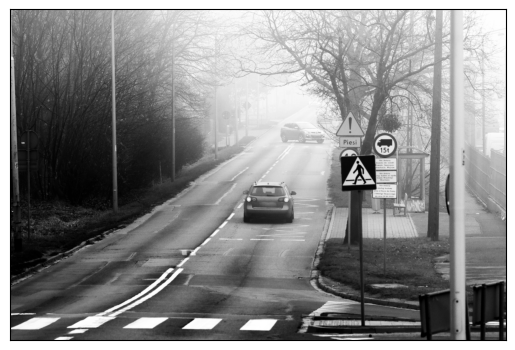

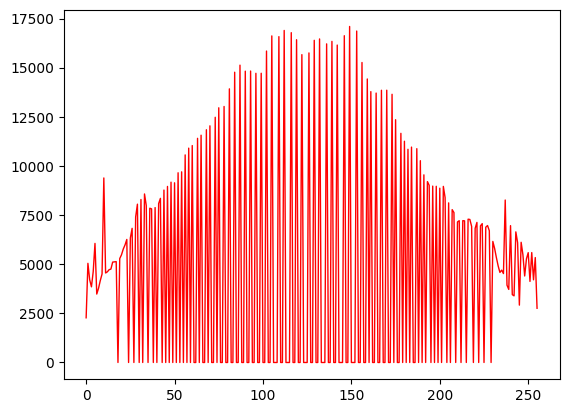

([<matplotlib.lines.Line2D at 0x21799a9a560>], None)

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('mistyroad.jpg')

#컬러 이미지를 흑백으로 변환
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#x/y축 눈금 제거
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([gray],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1),plt.show()

#히스토그램 평활화
equal=cv.equalizeHist(gray)
plt.imshow(equal,cmap='gray'),plt.xticks([]),plt.yticks([]),plt.show()

h=cv.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1),plt.show()

**3-7** 컨볼루션 적용

In [25]:
import cv2 as cv
import numpy as np

img = cv.imread('soccer.jpg')
img = cv.resize(img, dsize=(0,0), fx=0.4, fy=0.4)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.putText(gray, 'soccer', (10,20), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
cv.imshow('Original', gray)

smooth = np.hstack((
    cv.GaussianBlur(gray, (5,5), 0.0),
    cv.GaussianBlur(gray, (9,9), 0.0),
    cv.GaussianBlur(gray, (15,15), 0.0)
))
cv.imshow('Smooth', smooth)

femboss=np.array([[-1.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0],
                  [0.0, 0.0, 1.0]])

gray16=np.int16(gray)
emboss=np.uint8(np.clip(cv.filter2D(gray16,-1,femboss)+128,0,255))
emboss_bad=np.uint8(cv.filter2D(gray16,-1,femboss)+128)
emboss_worse=cv.filter2D(gray,-1,femboss)

cv.imshow('Emboss',emboss)
cv.imshow('Emboss_bad',emboss_bad)
cv.imshow('Emboss_worse',emboss_worse)

cv.waitKey()
cv.destroyAllWindows()

**보간을 이용해 영상의 기하 변환화기**

In [35]:
import cv2 as cv

img=cv.imread('rose.png')
patch=img[250:350,170:270,:]

img=cv.rectangle(img,(170,250),(270,350),(255,0,0),3)
patch1=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_NEAREST)
patch2=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_LINEAR)
patch3=cv.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv.INTER_CUBIC)

cv.imshow('original',img)
cv.imshow('Resize nearest', patch1)
cv.imshow('Resize bilinear', patch2)
cv.imshow('Resize bicubic', patch3)

cv.waitKey()
cv.destroyAllWindows()